In [401]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [402]:
# It is used to print all the rows and columns inside the dataset

# pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [403]:
# Importing dataset
data = pd.read_csv(r"C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\transactions_fraud.csv")

In [404]:
data.head()

,transaction_id,customer_id,device_id,merchant_id,timestamp,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,1/18/24 19:23,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,3/30/24 2:22,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,1/4/24 17:26,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0
3,4,2755,29904,624,1/27/24 16:00,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,0
4,5,2732,24151,501,2/20/24 23:14,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,0


In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   transaction_id                  50000 non-null  int64  
 1   customer_id                     50000 non-null  int64  
 2   device_id                       50000 non-null  int64  
 3   merchant_id                     50000 non-null  int64  
 4   timestamp                       50000 non-null  object 
 5   amount                          50000 non-null  float64
 6   payment_method                  50000 non-null  object 
 7   is_international                50000 non-null  int64  
 8   merchant_category               50000 non-null  object 
 9   ip_address_risk_score           50000 non-null  float64
 10  device_trust_score              50000 non-null  float64
 11  txn_count_last_24h              50000 non-null  int64  
 12  avg_amount_last_24h             

In [406]:
# The columns present in the dataset is 
print("The columns present in the dataset are :")
data.columns

The columns present in the dataset are :


Index(['transaction_id', 'customer_id', 'device_id', 'merchant_id',
       'timestamp', 'amount', 'payment_method', 'is_international',
       'merchant_category', 'ip_address_risk_score', 'device_trust_score',
       'txn_count_last_24h', 'avg_amount_last_24h',
       'merchant_diversity_last_7d', 'device_change_flag',
       'location_change_flag', 'authentication_method',
       'otp_success_rate_customer', 'past_fraud_count_customer',
       'past_disputes_customer', 'merchant_historical_fraud_rate',
       'hour_of_day', 'day_of_week', 'is_weekend', 'is_fraud'],
      dtype='object')

In [407]:
data.shape

(50000, 25)

In [408]:
print("There are {} rows present in 'Tranasaction dataset'".format(data.shape[0]))
print("There are {} columns present in 'Tranasaction dataset'".format(data.shape[1]))

There are 50000 rows present in 'Tranasaction dataset'
There are 25 columns present in 'Tranasaction dataset'


* The dataset is little large, containing around 50,000 rows.
* Before taking a sample, let's check the proportions of fraud and genuine transactions.
* In this type of dataset, fraud cases are usually fewer compared to genuine transactions.

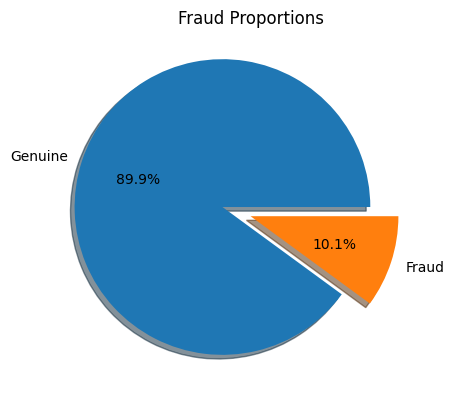

In [409]:
myexplode = [0.2, 0]
plt.pie(data['is_fraud'].value_counts(), explode=myexplode, shadow = True, autopct='%1.1f%%', labels=['Genuine','Fraud'])
plt.title('Fraud Proportions')
plt.show()


The dataset contains approximately 10.1% fraudulent and 90% genuine transactions, indicating a moderate class imbalance.
Since the total size of the dataset is 50,000 rows, which is manageable for model training, sampling is unnecessary.
Therefore, the final decision is to proceed with the full dataset for analysis and model development.

In [410]:
data.sample(5)

,transaction_id,customer_id,device_id,merchant_id,timestamp,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
44547,44548,1694,29753,665,2/5/24 0:34,2258.60,UPI,0,Fashion,0.025960,0.342615,7,772.30,10,0,0,OTP,0.701914,2,1,0.092456,0,0,0,0
25647,25648,3570,28623,569,2/20/24 0:16,14069.90,CARD,0,Gaming,0.177178,0.110385,10,3116.53,6,0,0,PIN,0.871639,0,1,0.145550,0,1,0,0
45227,45228,4463,22567,751,2/11/24 9:45,3962.43,UPI,0,Fashion,0.540482,0.829264,10,9442.03,4,0,0,OTP,0.946187,0,3,0.110060,9,6,1,0
39862,39863,1996,20701,607,1/5/24 5:58,5171.21,UPI,1,Fashion,0.182650,0.237676,6,5500.28,10,0,0,OTP,0.837460,2,3,0.138540,5,4,0,0
13918,13919,1970,24682,532,1/9/24 19:40,14383.98,NETBANKING,0,Fashion,0.355040,0.795415,8,14798.51,7,0,0,3DS,0.977408,2,0,0.148303,19,1,0,0


# Cleaning The Dataset

In [411]:
# Checking for the duplicates
data.duplicated().sum()

# there are no duplicates presents in our data

np.int64(0)

In [412]:
# Checking for unique values, missing values and Percentage fo missing values in our data sets

unique_values = data.nunique(dropna=False)
missing_values = data.isnull().sum()
percent_missing_values = data.isnull().sum() / data.shape[0] * 100

values_df = {
    "Unique values" : unique_values,
    "Missing values" : missing_values,
    "Missing value Percent" : percent_missing_values
}

values_df = pd.DataFrame(values_df)
values_df = values_df.sort_values(by="Missing value Percent",ascending=False)
values_df.index.name = "Columns"

# display the dataframe with horizontal bars using styling
display(values_df.style.background_gradient(subset=["Missing value Percent"], cmap='Blues'))

,Unique values,Missing values,Missing value Percent
Columns,,,
transaction_id,50000,0,0.000000
customer_id,4000,0,0.000000
device_id,9946,0,0.000000
merchant_id,300,0,0.000000
timestamp,41413,0,0.000000
amount,49412,0,0.000000
payment_method,4,0,0.000000
is_international,2,0,0.000000
merchant_category,6,0,0.000000


There are no missing values present in our dataset so we can proceed fruther

In [413]:
data.head(3)

,transaction_id,customer_id,device_id,merchant_id,timestamp,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,1/18/24 19:23,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,3/30/24 2:22,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,1/4/24 17:26,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0


## Analyse Categorical columns for data preporcessing

In [414]:
categorical = [val for val in data.columns if data[val].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['timestamp', 'payment_method', 'merchant_category', 'authentication_method']


In [415]:
data[categorical].head()

,timestamp,payment_method,merchant_category,authentication_method
0,1/18/24 19:23,WALLET,Travel,NONE
1,3/30/24 2:22,CARD,Electronics,OTP
2,1/4/24 17:26,UPI,Fashion,PIN
3,1/27/24 16:00,CARD,Utilities,PIN
4,2/20/24 23:14,CARD,Gaming,OTP


Summary of categorical variables:

There is a date variable. It is denoted by timestamp.

There are 4 categorical variables.

These are given by timestamp, payment_method, merchant_category, authentication_method.

There are two column that has 4 unique value and one column contain 6 unique values - payment_method, authentication_method, merchant_category


In [416]:
# The unique values present in the categorical columns are

print(f"In payment_method column the unique values are : {data['payment_method'].unique()}")
print(f"In authentication_method column the unique values are :{data['authentication_method'].unique()}")
print(f"In merchant_category column the unique values are :{data['merchant_category'].unique()}")

In payment_method column the unique values are : ['WALLET' 'CARD' 'UPI' 'NETBANKING']
In authentication_method column the unique values are :['NONE' 'OTP' 'PIN' '3DS']
In merchant_category column the unique values are :['Travel' 'Electronics' 'Fashion' 'Utilities' 'Gaming' 'Grocery']


In [417]:
# checking is there are missing values present in categorical column

data[categorical].isnull().sum()

timestamp                0
payment_method           0
merchant_category        0
authentication_method    0
dtype: int64

## Analyse Numerical columns for data preporcessing

In [418]:
numerical = data.select_dtypes('int').columns

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :',numerical)

There are 15 numerical variables

The numerical variables are : Index(['transaction_id', 'customer_id', 'device_id', 'merchant_id',
       'is_international', 'txn_count_last_24h', 'merchant_diversity_last_7d',
       'device_change_flag', 'location_change_flag',
       'past_fraud_count_customer', 'past_disputes_customer', 'hour_of_day',
       'day_of_week', 'is_weekend', 'is_fraud'],
      dtype='object')


In [419]:
data[numerical].head()

,transaction_id,customer_id,device_id,merchant_id,is_international,txn_count_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,past_fraud_count_customer,past_disputes_customer,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,0,7,3,0,0,1,2,19,3,0,0
1,2,4095,29542,764,0,1,5,0,1,1,1,2,5,1,0
2,3,3618,25236,671,0,0,4,0,0,0,1,17,3,0,0
3,4,2755,29904,624,0,5,6,0,0,0,3,16,5,1,0
4,5,2732,24151,501,0,11,10,1,0,2,0,23,1,0,0


Summary of numerical columns:

There are three columns which are unique identifier. It is denoted by column_name_id.

There are 15 numerical columns.

These are given by transaction_id, customer_id, device_id, merchant_id,
       is_international, txn_count_last_24h, merchant_diversity_last_7d,
       device_change_flag, location_change_flag,
       past_fraud_count_customer, past_disputes_customer, hour_of_day,
       day_of_week, is_weekend, is_fraud.

There are 5 binary value columns- is_international, device_change_flag, location_change_flag, is_weekend, is_fraud

is_fraud is the Traget column. Which is also a binary column


In [420]:
# checking is there are missing values present in numerical column

data[numerical].isnull().sum()

transaction_id                0
customer_id                   0
device_id                     0
merchant_id                   0
is_international              0
txn_count_last_24h            0
merchant_diversity_last_7d    0
device_change_flag            0
location_change_flag          0
past_fraud_count_customer     0
past_disputes_customer        0
hour_of_day                   0
day_of_week                   0
is_weekend                    0
is_fraud                      0
dtype: int64

## Univarient Cleaning

In [421]:
# timestamp column
data['timestamp'].value_counts()

timestamp
1/28/24 6:57     6
2/20/24 23:16    5
2/29/24 15:58    5
2/8/24 4:09      5
1/30/24 11:50    5
                ..
2/3/24 5:16      1
2/28/24 23:31    1
2/1/24 17:48     1
3/18/24 20:58    1
2/11/24 17:12    1
Name: count, Length: 41413, dtype: int64

In [422]:
# Little bit feature engineering
data.insert(loc=4, column="transaction_date", value=pd.to_datetime(data['timestamp']).dt.date)
data.insert(loc=5, column="transaction_time", value=pd.to_datetime(data['timestamp']).dt.time)
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
# transaction_time are datetime.time objects — keep as strings (or keep as time objects) to avoid conversion error
data['transaction_time'] = data['transaction_time'].astype(str)

C:\Users\mabin\AppData\Local\Temp\ipykernel_38276\3291427553.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.insert(loc=4, column="transaction_date", value=pd.to_datetime(data['timestamp']).dt.date)
C:\Users\mabin\AppData\Local\Temp\ipykernel_38276\3291427553.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.insert(loc=5, column="transaction_time", value=pd.to_datetime(data['timestamp']).dt.time)


In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   transaction_id                  50000 non-null  int64         
 1   customer_id                     50000 non-null  int64         
 2   device_id                       50000 non-null  int64         
 3   merchant_id                     50000 non-null  int64         
 4   transaction_date                50000 non-null  datetime64[ns]
 5   transaction_time                50000 non-null  object        
 6   timestamp                       50000 non-null  object        
 7   amount                          50000 non-null  float64       
 8   payment_method                  50000 non-null  object        
 9   is_international                50000 non-null  int64         
 10  merchant_category               50000 non-null  object        
 11  ip

In [424]:
data.drop(columns='timestamp',inplace=True, axis=1)

In [425]:
data.head()

,transaction_id,customer_id,device_id,merchant_id,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,2024-01-18,19:23:00,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,2024-03-30,02:22:00,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,2024-01-04,17:26:00,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0
3,4,2755,29904,624,2024-01-27,16:00:00,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,0
4,5,2732,24151,501,2024-02-20,23:14:00,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,0


In [426]:
# amount column
data['amount']

0        18780.52
1        18955.06
2        10743.34
3         5054.75
4        14799.50
           ...   
49995     3675.86
49996    10991.62
49997     2756.24
49998     9097.91
49999    16186.09
Name: amount, Length: 50000, dtype: float64

In [427]:
data['amount'].dtype

dtype('float64')

In [428]:
data.head()

,transaction_id,customer_id,device_id,merchant_id,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
0,1,1357,20937,720,2024-01-18,19:23:00,18780.52,WALLET,0,Travel,0.243550,0.116606,7,6055.25,3,0,0,NONE,0.769328,1,2,0.069502,19,3,0,0
1,2,4095,29542,764,2024-03-30,02:22:00,18955.06,CARD,0,Electronics,0.119761,0.030579,1,13366.74,5,0,1,OTP,0.468411,1,1,0.010010,2,5,1,0
2,3,3618,25236,671,2024-01-04,17:26:00,10743.34,UPI,0,Fashion,0.565367,0.183770,0,7359.14,4,0,0,PIN,0.464356,0,1,0.118434,17,3,0,0
3,4,2755,29904,624,2024-01-27,16:00:00,5054.75,CARD,0,Utilities,0.843842,0.717286,5,10923.57,6,0,0,PIN,0.635799,0,3,0.114947,16,5,1,0
4,5,2732,24151,501,2024-02-20,23:14:00,14799.50,CARD,0,Gaming,0.202402,0.041616,11,6027.72,10,1,0,OTP,0.684301,2,0,0.014550,23,1,0,0


In [429]:
# payment_method column
data['payment_method'].value_counts(dropna=False)

payment_method
UPI           27573
CARD          12444
NETBANKING     5053
WALLET         4930
Name: count, dtype: int64

In [430]:
# is_international column

data['is_international'].value_counts(dropna=False)

is_international
0    48521
1     1479
Name: count, dtype: int64

In [431]:
data['hour_of_day'].value_counts().sort_index()

hour_of_day
0     2089
1     2021
2     2048
3     2059
4     2056
5     2013
6     2169
7     2099
8     2048
9     2101
10    2167
11    2087
12    2036
13    2130
14    2066
15    2104
16    2100
17    2052
18    2089
19    2087
20    2122
21    2150
22    2052
23    2055
Name: count, dtype: int64

In [432]:
data['day_of_week'].value_counts().sort_index()

day_of_week
0    7125
1    7212
2    7350
3    7384
4    7223
5    7148
6    6558
Name: count, dtype: int64

In [433]:
data['is_weekend'].value_counts()

is_weekend
0    36294
1    13706
Name: count, dtype: int64

In [434]:
# merchant_category
data['merchant_category'].value_counts()

merchant_category
Electronics    8399
Gaming         8397
Travel         8391
Grocery        8334
Fashion        8253
Utilities      8226
Name: count, dtype: int64

In [435]:
for val in data['merchant_category']:
    # check if any character in the string is a digit
    if any(ch.isdigit() for ch in str(val)):
        print(val)

In [436]:
data.sample(10)

,transaction_id,customer_id,device_id,merchant_id,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud
8157,8158,1624,22417,532,2024-02-14,00:21:00,18897.15,UPI,0,Utilities,0.859765,0.894660,9,5288.68,9,0,0,OTP,0.887872,0,1,0.035020,0,2,0,0
15693,15694,3028,23248,606,2024-01-04,09:43:00,5272.05,CARD,1,Gaming,0.360223,0.552279,6,14771.57,2,0,0,OTP,0.881665,1,3,0.055095,9,3,0,0
75,76,2902,28601,722,2024-03-10,22:48:00,9557.28,UPI,0,Utilities,0.085770,0.083487,3,8885.62,6,0,0,OTP,0.499465,0,4,0.091284,22,6,1,0
39222,39223,2994,24339,754,2024-02-29,16:18:00,15416.41,NETBANKING,0,Fashion,0.553529,0.982347,2,4079.62,2,0,0,3DS,0.913540,1,1,0.031398,16,3,0,0
6580,6581,2852,26780,761,2024-01-03,08:37:00,18568.01,CARD,0,Grocery,0.819018,0.032683,4,9390.50,10,0,0,OTP,0.538358,2,1,0.138881,8,2,0,1
13784,13785,4902,25515,529,2024-03-05,04:08:00,10442.03,WALLET,0,Travel,0.252567,0.275632,10,5637.65,4,0,0,OTP,0.609048,1,2,0.113605,4,1,0,0
32497,32498,2555,28063,606,2024-02-06,09:04:00,11448.87,CARD,1,Travel,0.291632,0.551156,0,11321.23,1,0,0,3DS,0.536241,1,1,0.079878,9,1,0,0
907,908,1692,22180,638,2024-02-17,06:04:00,14594.73,CARD,0,Fashion,0.697532,0.185978,2,9947.57,2,0,0,NONE,0.947146,0,3,0.058469,6,5,1,1
39660,39661,3945,20740,780,2024-01-26,15:29:00,17232.14,NETBANKING,0,Travel,0.814496,0.881383,3,10376.98,1,0,0,NONE,0.581311,1,3,0.042128,15,4,0,0
46250,46251,3169,26785,563,2024-02-02,19:03:00,17238.54,UPI,0,Fashion,0.868284,0.391247,0,4965.19,1,0,0,NONE,0.884043,1,1,0.035364,19,4,0,1


In [437]:
# Checking wether the amounts is greater then 0

data[data['amount'] < 0]

,transaction_id,customer_id,device_id,merchant_id,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud


In [438]:
# Checking otp_success_rate_customer is from 0 to 1

data[(data['otp_success_rate_customer'] < 0) | (data['otp_success_rate_customer'] > 1)]

,transaction_id,customer_id,device_id,merchant_id,transaction_date,transaction_time,amount,payment_method,is_international,merchant_category,ip_address_risk_score,device_trust_score,txn_count_last_24h,avg_amount_last_24h,merchant_diversity_last_7d,device_change_flag,location_change_flag,authentication_method,otp_success_rate_customer,past_fraud_count_customer,past_disputes_customer,merchant_historical_fraud_rate,hour_of_day,day_of_week,is_weekend,is_fraud


In [439]:
data.to_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\Career247_Capstone_Project\Fraud_Detection_Project\data\raw\cleaned_data_v1.csv', index=False)
